In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Password:

In [ ]:
## 사용자 정보

In [2]:

DEMO = pd.read_csv('./data/LPOINT_BIG_COMP_01_DEMO.csv') 

In [3]:
DEMO.head(5)

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17


In [4]:
## 상품구매 정보



In [5]:
PRODUCT = pd.read_csv('./data/LPOINT_BIG_COMP_02_PDDE.csv')



/var/folders/1r/w554lp_s677_dbwqw3vmnhmh0000gn/T/ipykernel_3607/4103751262.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  PRODUCT = pd.read_csv('./data/LPOINT_BIG_COMP_02_PDDE.csv')


In [6]:
PRODUCT.head(5)



,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [7]:
## 제휴사 이용

In [8]:
COPORATION = pd.read_csv('./data/LPOINT_BIG_COMP_03_COP_U.csv')



In [9]:
COPORATION.head(5)



,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [10]:
## 상품 분류 정보

In [11]:
CATEGORY = pd.read_csv('./data/LPOINT_BIG_COMP_04_PD_CLAC.csv')



In [95]:
CATEGORY



,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [13]:
CATEGORY[CATEGORY['pd_c'] == 'PD0288']




,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
287,PD0288,임대매출,기타(비상품),임대매출


In [91]:
CATEGORY[CATEGORY['clac_mcls_nm'] == '임대매출']

pd_c    pd_nm  clac_hlv_nm  clac_mcls_nm
PD0288  임대매출   기타(비상품)      임대매출            1
dtype: int64

In [94]:
CATEGORY[(CATEGORY['clac_mcls_nm'] != '임대매출')]

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [14]:
PRO_CATE_INNER = pd.merge(PRODUCT, CATEGORY, left_on = 'pd_c', right_on = 'pd_c', how = 'inner')



In [15]:
PRO_CATE_INNER[PRO_CATE_INNER['pd_c'] == 'PD0288']


,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
3661917,M998574012,A01033314080,1,A01,A010063,PD0288,20210201,10,1000.0,1,임대매출,기타(비상품),임대매출
3661918,M237281821,A01033318646,1,A01,A010059,PD0288,20210201,10,21000.0,1,임대매출,기타(비상품),임대매출
3661919,M998574012,A01033368704,1,A01,A010063,PD0288,20210201,11,1000.0,1,임대매출,기타(비상품),임대매출
3661920,M600356246,A01033377319,1,A01,A010062,PD0288,20210201,11,15800.0,1,임대매출,기타(비상품),임대매출
3661921,M237281821,A01033385493,1,A01,A010059,PD0288,20210201,12,20000.0,1,임대매출,기타(비상품),임대매출
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696190,M505141659,A02012114848,1,A02,A020004,PD0288,20211118,11,100000.0,1,임대매출,기타(비상품),임대매출
3696191,M505141659,A02012114848,1,A02,A020004,PD0288,20211118,11,3000000.0,3,임대매출,기타(비상품),임대매출
3696192,M505141659,A02012114848,1,A02,A020004,PD0288,20211118,11,40000.0,4,임대매출,기타(비상품),임대매출
3696193,M505141659,A02012115601,1,A02,A020004,PD0288,20211118,11,100000.0,1,임대매출,기타(비상품),임대매출


In [16]:
## 점포 정보 

In [17]:
STORE = pd.read_csv('./data/LPOINT_BIG_COMP_05_BR.csv')



In [18]:
STORE.head(5)

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [19]:
## 엘페이  결제 내역

In [20]:
PAY = pd.read_csv('./data/LPOINT_BIG_COMP_06_LPAY.csv')



In [21]:
PAY.head(5)



,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
0,M629656521,210803210311226,A03,1,20210803,21,10900
1,M216016456,210803130167542,L01,2,20210803,13,6860
2,M205142844,210803140275112,A02,1,20210803,14,9000
3,M737010483,210803040637594,A06,2,20210803,4,36740
4,M707775545,210803140675502,A06,2,20210803,14,138500


In [22]:
# 연령별 인원 파악

DEMO['ages'].value_counts()




40대    9863
30대    7736
50대    5633
20대    3853
60대    2115
70대     713
Name: ages, dtype: int64

In [117]:
DEMO[(DEMO['ages'] == '20대') & (DEMO['ma_fem_dv'] == '남성')]

# 20대 남성 1340명

,cust,ma_fem_dv,ages,zon_hlv
30,M001403108,남성,20대,Z10
59,M002188008,남성,20대,Z17
61,M002352655,남성,20대,Z17
152,M005731374,남성,20대,Z05
176,M006358338,남성,20대,Z04
...,...,...,...,...
29798,M995885091,남성,20대,Z17
29857,M997821980,남성,20대,Z12
29866,M998129365,남성,20대,Z17
29869,M998222891,남성,20대,Z17


In [118]:
DEMO[(DEMO['ages'] == '30대') & (DEMO['ma_fem_dv'] == '남성')]

# 30대 남성 2696명

,cust,ma_fem_dv,ages,zon_hlv
12,M000557840,남성,30대,Z11
13,M000608261,남성,30대,Z17
31,M001405587,남성,30대,Z10
33,M001444118,남성,30대,Z17
38,M001640580,남성,30대,Z09
...,...,...,...,...
29893,M999180761,남성,30대,Z17
29897,M999238704,남성,30대,Z04
29900,M999428656,남성,30대,Z15
29907,M999673157,남성,30대,Z10


In [23]:
# fig, ax = plt.subplots(1,1, figsize = (14,8))
# ax.bar[DEMO['ages'].value_counts()]
# plt.show()

In [24]:
# 남녀 비율 

DEMO['ma_fem_dv'].value_counts()


여성    20083
남성     9830
Name: ma_fem_dv, dtype: int64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/Users/narihwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/narihwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/narihwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


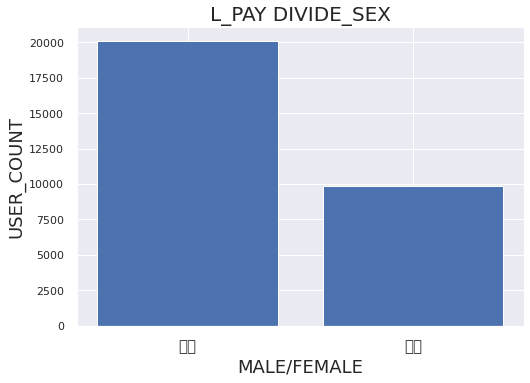

In [25]:
SEX_VIS= DEMO['ma_fem_dv'].value_counts()


label = ['남성','여성']
index = np.arange(len(label))

plt.bar(index, SEX_VIS)
plt.title('L_PAY DIVIDE_SEX', fontsize=20)
plt.xlabel('MALE/FEMALE', fontsize=18)
plt.ylabel('USER_COUNT', fontsize=18)
plt.xticks(index, label, fontsize=15)
plt.show()


In [26]:
# 연령대 별 남성, 여성 비율 

DEMO[(DEMO['ages'] == '50대') & (DEMO['ma_fem_dv'] =='남성')].value_counts()

cust        ma_fem_dv  ages  zon_hlv
M000555652  남성         50대   Z10        1
M675689265  남성         50대   Z10        1
M674141458  남성         50대   Z08        1
M673519038  남성         50대   Z09        1
M673226700  남성         50대   Z11        1
                                       ..
M328491765  남성         50대   Z11        1
M327684414  남성         50대   Z11        1
M327445014  남성         50대   Z10        1
M327416993  남성         50대   Z14        1
M999493501  남성         50대   Z03        1
Length: 1718, dtype: int64

In [27]:
# 제품군 가장 많이 소비한 제품 TOP 10 
 
PRODUCT['pd_c'].value_counts().sort_values(ascending = False).head(10)

PD0232    95092
PD1484    88584
PD1156    80265
PD0403    61778
PD0228    56699
PD0480    56412
PD1387    54862
PD1486    52154
PD0413    48168
PD1330    46616
Name: pd_c, dtype: int64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


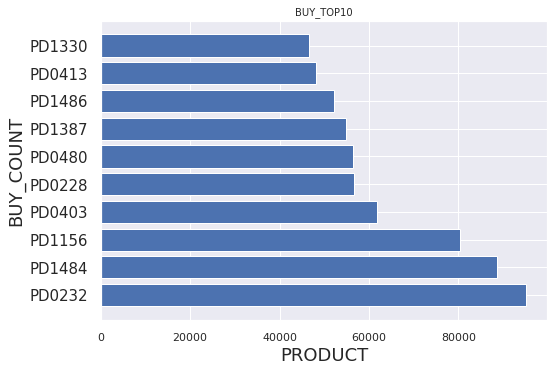

In [28]:
PD_10 = PRODUCT['pd_c'].value_counts().sort_values(ascending = False).head(10)

label = ['PD0232', 'PD1484', 'PD1156', 'PD0403', 'PD0228', 'PD0480' ,'PD1387', 'PD1486','PD0413',
         'PD1330']
index = np.arange(len(label))

plt.barh(index, PD_10)
plt.title('BUY_TOP10', fontsize=10)
plt.xlabel('PRODUCT', fontsize=18)
plt.ylabel('BUY_COUNT', fontsize=18)
plt.yticks(index, label, fontsize=15)
plt.show()



In [29]:
PRODUCT['pd_c'].value_counts().sort_values(ascending = False).tail(10)

PD0523    1
PD0987    1
PD1632    1
PD0340    1
PD0474    1
PD1010    1
PD1768    1
PD0940    1
PD1587    1
PD0861    1
Name: pd_c, dtype: int64

In [30]:


CATEGORY[CATEGORY['pd_c'] == 'PD1330'] # 제품 코드의 상품

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
1329,PD1330,국산맥주,주류,맥주


In [31]:
PAY.shape 

(353184, 7)

In [32]:
PRODUCT.shape

(4381743, 10)

In [33]:
np.shape(DEMO)

(29913, 4)

In [34]:
# 데이터 개수
len(DEMO) #29913
len(PRODUCT) #4381743
len(PAY) # 353184

353184

In [35]:
DEMO_PAY_INNER = pd.merge(DEMO, PAY, left_on = 'cust', right_on = 'cust', how = 'inner')
print(DEMO_PAY_INNER)





              cust ma_fem_dv ages zon_hlv           rct_no cop_c  chnl_dv  \
0       M000136117        여성  30대     Z11  210926220176038   D01        2   
1       M000136117        여성  30대     Z11  211120000687692   A06        2   
2       M000136117        여성  30대     Z11  210104110684235   A06        2   
3       M000136117        여성  30대     Z11  210109140124587   A01        1   
4       M000419293        여성  40대     Z17  211103140120216   D01        2   
...            ...       ...  ...     ...              ...   ...      ...   
353179  M999962961        여성  50대     Z17  210724200025828   L00        2   
353180  M999962961        여성  50대     Z17  210214170187495   A01        1   
353181  M999962961        여성  50대     Z17  210214180290789   C02        1   
353182  M999962961        여성  50대     Z17  210113180665862   A06        2   
353183  M999962961        여성  50대     Z17  210117130146991   A01        1   

           de_dt  de_hr   buy_am  
0       20210926     22    15100  
1    

In [36]:
LPAY_USER = DEMO_PAY_INNER.groupby('cust').sum() #LPAY_USER cust 그룹화



In [37]:
print(LPAY_USER)




                       rct_no  chnl_dv       de_dt  de_hr   buy_am
cust                                                              
M000136117    842259471672552        7    80842259     47  1137501
M000419293   8839985526331283       68   848839979    652  3528701
M000494848  19806017154217656      182  1899806005   1212  4599615
M000557840   8005956289745145       38   768005950    628  1593340
M000871427   1053918710855461        6   101053918     71    48700
...                       ...      ...         ...    ...      ...
M999227380    422035310335634        4    40422035     31   468200
M999268192   6315122754311351       59   606315119    375  1025160
M999599111  16208673162432140      154  1556208662   1115  4131637
M999770689  16651438719589430       84  1596651430    869   664680
M999962961   3368192595725083       23   323368190    259  3433636

[8906 rows x 5 columns]


In [38]:
#DEMO_PAY_INNER['ages'].value_counts()
# 나이대 성별 엘페이 이용자 
DEMO_PAY_INNER.groupby('ages')['ma_fem_dv'].value_counts()


ages  ma_fem_dv
20대   여성            17989
      남성             8502
30대   여성            64469
      남성            35405
40대   여성           114527
      남성            48819
50대   여성            40381
      남성            15241
60대   여성             5369
      남성             1863
70대   남성              420
      여성              199
Name: ma_fem_dv, dtype: int64

In [39]:
#DEMO_PAY_INNER = pd.merge(DEMO, PAY, left_on = 'cust', right_on = 'cust', how = 'inner')

# 사용자,상품,
DEMO_PRODUCT_PAY=pd.merge(DEMO_PAY_INNER, PRODUCT,left_on = 'cust', right_on = 'cust', how = 'inner')




In [40]:
DEMO_PRODUCT_PAY




,cust,ma_fem_dv,ages,zon_hlv,rct_no_x,cop_c_x,chnl_dv_x,de_dt_x,de_hr_x,buy_am_x,rct_no_y,chnl_dv_y,cop_c_y,br_c,pd_c,de_dt_y,de_hr_y,buy_am_y,buy_ct
0,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007342225,1,A01,A010018,PD1764,20210108,17,1570000.0,1
1,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007377556,1,A01,A010018,PD0957,20210108,17,159000.0,1
2,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007392333,1,A01,A010018,PD0640,20210108,17,216000.0,1
3,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007429896,1,A01,A010018,PD0964,20210108,18,1060000.0,1
4,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007433795,1,A01,A010018,PD0964,20210108,18,840000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129258064,M999962961,여성,50대,Z17,210117130146991,A01,1,20210117,13,2600000,A05001012161,1,A05,A050039,PD0541,20210313,20,599000.0,1
129258065,M999962961,여성,50대,Z17,210117130146991,A01,1,20210117,13,2600000,E06002810292,2,A06,NaN,PD0959,20210113,18,129000.0,1
129258066,M999962961,여성,50대,Z17,210117130146991,A01,1,20210117,13,2600000,E06004609359,2,A06,NaN,PD0954,20210122,14,34300.0,1
129258067,M999962961,여성,50대,Z17,210117130146991,A01,1,20210117,13,2600000,E06025413888,2,A06,NaN,PD0967,20210406,17,89000.0,1


In [41]:
#REAL_USER= DEMO_PRODUCT_PAY.drop_duplicates('cust') #실 엘페이 사용자 사용건수 8676



In [119]:
# 20대, 30대 남성이 가장 많이 소비하는 제품 또는 제품 카테고리
# REAL_USER = ['ages', 'ma_fem_dv'] == ('20대', '남성')

#REAL_USER = REAL_USER.to_dict() #실제 사용자 테이블을 딕셔너리로 바꿈, 키값 : ages, ma_fem_dv, pd_c 벨류 값 : 20/30대, [REAL_USER['ages'] = '30대']
#REAL_USER['ages'] = '20대'
# REAL_USER['ages'] = '30대'
# REAL_USER['ma_fem_dv'] = '남성'


REAL = DEMO_PRODUCT_PAY[['ages', 'ma_fem_dv', 'chnl_dv_y','cop_c_y','br_c','pd_c',]]
    
condition = ((REAL.ages == '20대') + (REAL.ages =='30대')) * (REAL.ma_fem_dv == '남성')

test_chnl = REAL.chnl_dv_y[condition]
test_cop = REAL.cop_c_y[condition]
test_br = REAL.br_c[condition]
test_pd = REAL.pd_c[condition]
test_df_1 = REAL[condition]
test_df_1

/Users/narihwang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead.
  warnings.warn(
/Users/narihwang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  warnings.warn(


,ages,ma_fem_dv,chnl_dv_y,cop_c_y,br_c,pd_c
40358,30대,남성,1,A01,A010024,PD0777
40359,30대,남성,1,A01,A010045,PD0298
40360,30대,남성,1,A02,A020090,PD1184
40361,30대,남성,1,A02,A020090,PD1174
40362,30대,남성,1,A02,A020090,PD1330
...,...,...,...,...,...,...
129224423,30대,남성,1,A04,A043579,PD0154
129224424,30대,남성,1,A04,A040136,PD1179
129224425,30대,남성,1,A04,A040108,PD0332
129224426,30대,남성,2,A06,NaN,PD0507


In [149]:
test_df_1[(test_df_1['ages']=='20대') * (test_df_1.groupby('pd_c').value_counts())]

ValueError: cannot join with no overlapping index names

In [144]:
# 중복을 포함한 제품군 순위
test_df_1.groupby('pd_c').sum().sort_values(by ='chnl_dv_y' ,ascending=False).head(20)

,chnl_dv_y
pd_c,
PD0507,497332
PD1173,242805
PD0232,230264
PD0529,218210
PD1156,211086
PD0413,206734
PD1181,194275
PD0228,192485
PD1152,191380


In [151]:
buysell = test_df_1.groupby('pd_c').sum().sort_values(by ='chnl_dv_y' ,ascending=False).head(20)

In [152]:
CATEGORY_BUYSELL = pd.merge(buysell, CATEGORY, left_on = 'pd_c', right_on= 'pd_c', how = 'inner')

In [154]:
# 20, 30대 남성 가장 많이 사는 소비군 
CATEGORY_BUYSELL[['pd_c','pd_nm']]

,pd_c,pd_nm
0,PD0507,백화점/마트모바일상품권
1,PD1173,생수
2,PD0232,일반스낵
3,PD0529,기타생활서비스
4,PD1156,일반우유
5,PD0413,국물용기라면
6,PD1181,커피음료
7,PD0228,감자스낵
8,PD1152,가공우유
9,PD1331,수입맥주


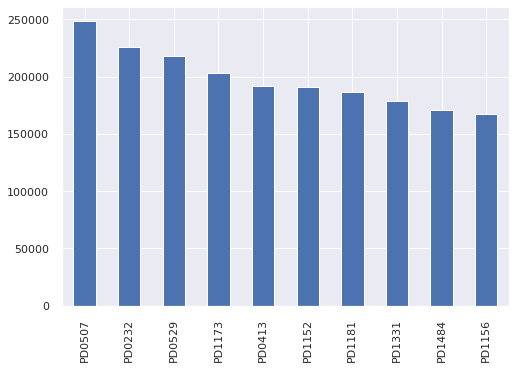

In [120]:
# 20, 30대들이 가장 많이 지출하는 소비 목록 TOP10
test_df_1['pd_c'].value_counts().head(10).plot.bar()
plt.xticks(rotation = 90)
plt.show()

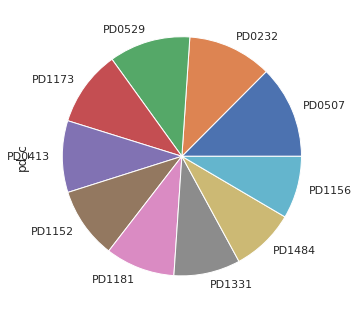

In [123]:
test_df_1['pd_c'].value_counts().head(10).plot.pie()
plt.xticks(rotation = 90)
plt.show()

In [124]:
# 20, 30대 남성들이 온/오프라인 쇼핑 선호
test_df_1['chnl_dv_y'].value_counts().sort_values(ascending = False).head(10)

1    10208954
2     1780363
Name: chnl_dv_y, dtype: int64

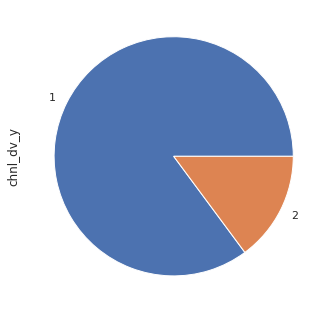

In [125]:
test_df_1['chnl_dv_y'].value_counts().head(5).plot.pie()
plt.xticks(rotation = 90)
plt.show()

In [159]:
#20대 남성 온/오프라인 비율
test_df_1[]

ages         0.0
ma_fem_dv    0.0
chnl_dv_y    0.0
cop_c_y      0.0
br_c         0.0
pd_c         0.0
dtype: float64

In [47]:
DEMO_PRODUCT_PAY

,cust,ma_fem_dv,ages,zon_hlv,rct_no_x,cop_c_x,chnl_dv_x,de_dt_x,de_hr_x,buy_am_x,rct_no_y,chnl_dv_y,cop_c_y,br_c,pd_c,de_dt_y,de_hr_y,buy_am_y,buy_ct
0,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007342225,1,A01,A010018,PD1764,20210108,17,1570000.0,1
1,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007377556,1,A01,A010018,PD0957,20210108,17,159000.0,1
2,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007392333,1,A01,A010018,PD0640,20210108,17,216000.0,1
3,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007429896,1,A01,A010018,PD0964,20210108,18,1060000.0,1
4,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,A01007433795,1,A01,A010018,PD0964,20210108,18,840000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129258064,M999962961,여성,50대,Z17,210117130146991,A01,1,20210117,13,2600000,A05001012161,1,A05,A050039,PD0541,20210313,20,599000.0,1
129258065,M999962961,여성,50대,Z17,210117130146991,A01,1,20210117,13,2600000,E06002810292,2,A06,NaN,PD0959,20210113,18,129000.0,1
129258066,M999962961,여성,50대,Z17,210117130146991,A01,1,20210117,13,2600000,E06004609359,2,A06,NaN,PD0954,20210122,14,34300.0,1
129258067,M999962961,여성,50대,Z17,210117130146991,A01,1,20210117,13,2600000,E06025413888,2,A06,NaN,PD0967,20210406,17,89000.0,1


In [169]:
DEMO_PRODUCT_PAY_20= DEMO_PRODUCT_PAY[(DEMO_PRODUCT_PAY['ages'] == '20대') & (DEMO_PRODUCT_PAY['ma_fem_dv'] == '남성')]


DEMO_PRODUCT_PAY_20

,cust,ma_fem_dv,ages,zon_hlv,rct_no_x,cop_c_x,chnl_dv_x,de_dt_x,de_hr_x,buy_am_x,rct_no_y,chnl_dv_y,cop_c_y,br_c,pd_c,de_dt_y,de_hr_y,buy_am_y,buy_ct
55549,M001403108,남성,20대,Z10,210926110131146,A01,1,20210926,11,38300,A01087171032,1,A01,A010049,PD0402,20210313,11,17000.0,1
55550,M001403108,남성,20대,Z10,210926110131146,A01,1,20210926,11,38300,A01097712179,1,A01,A010049,PD0402,20210320,12,1800.0,1
55551,M001403108,남성,20대,Z10,210926110131146,A01,1,20210926,11,38300,A01132551256,1,A01,A010049,PD0402,20210412,18,5300.0,1
55552,M001403108,남성,20대,Z10,210926110131146,A01,1,20210926,11,38300,A01137620267,1,A01,A010049,PD0402,20210417,12,5500.0,1
55553,M001403108,남성,20대,Z10,210926110131146,A01,1,20210926,11,38300,A01142807747,1,A01,A010049,PD0402,20210420,17,8600.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128832913,M995885091,남성,20대,Z17,210729070661546,A06,2,20210729,7,54000,E06050134233,2,A06,NaN,PD0283,20211113,12,8900.0,1
128832914,M995885091,남성,20대,Z17,210729070661546,A06,2,20210729,7,54000,E06050340801,2,A06,NaN,PD0283,20211118,7,8900.0,1
128832915,M995885091,남성,20대,Z17,210729070661546,A06,2,20210729,7,54000,E06050692712,2,A06,NaN,PD0511,20211128,20,22000.0,1
128832916,M995885091,남성,20대,Z17,210729070661546,A06,2,20210729,7,54000,E06051607237,2,A06,NaN,PD0283,20211213,22,8900.0,1


In [179]:
DEMO_PRODUCT_PAY_20.groupby('pd_c').value_counts()

pd_c    cust        ma_fem_dv  ages  zon_hlv  rct_no_x         cop_c_x  chnl_dv_x  de_dt_x   de_hr_x  buy_am_x  rct_no_y      chnl_dv_y  cop_c_y  br_c     de_dt_y   de_hr_y  buy_am_y  buy_ct
PD0002  M332539888  남성         20대   Z04      211219160183153  C01      2          20211219  16       10000     A02096600130  1          A02      A020020  20210904  17       37900.0   1         1
        M883040926  남성         20대   Z17      211107120247033  A02      1          20211107  12       32260     A02076480433  1          A02      A020013  20211225  13       8900.0    1         1
                                              211227120203278  C02      1          20211227  12       6000      A02076480433  1          A02      A020013  20211225  13       8900.0    1         1
                                              211225090140741  C01      2          20211225  9        19700     A02076480433  1          A02      A020013  20211225  13       8900.0    1         1
                         

In [48]:
DEMO['zon_hlv'].value_counts()




Z10    8157
Z17    7881
Z16    2503
Z11    1840
Z04    1750
Z06    1080
Z14     988
Z13     896
Z12     803
Z08     739
Z15     677
Z09     642
Z03     600
Z05     576
Z01     474
Z07     204
Z02     103
Name: zon_hlv, dtype: int64

In [51]:
zone_buy = pd.merge(DEMO, COPORATION, left_on = 'cust', right_on = 'cust', how = 'inner')
zone_buy

,cust,ma_fem_dv,ages,zon_hlv,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M000034966,여성,40대,Z07,21103009D010634285,D01,D011011,1,20211030,20211030,9,3900
1,M000059535,여성,30대,Z12,21030317C012142421,C01,C010085,2,20210303,20210305,17,46000
2,M000136117,여성,30대,Z11,21062011D015519200,D01,D010062,1,20210620,20210620,11,17900
3,M000136117,여성,30대,Z11,21112110D014221594,D01,D010062,1,20211121,20211121,10,20500
4,M000136117,여성,30대,Z11,21080711D010617976,D01,D010062,1,20210807,20210807,11,14300
...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M999962961,여성,50대,Z17,21082822C011720870,C01,C010011,2,20210828,20210829,22,28000
248300,M999962961,여성,50대,Z17,21122317D014955261,D01,D010884,1,20211223,20211223,17,5900
248301,M999962961,여성,50대,Z17,21092413C024015416,C02,C020002,1,20210924,20210924,13,18900
248302,M999962961,여성,50대,Z17,21092413C021024828,C02,C020002,1,20210924,20210924,13,24000


In [126]:
men = DEMO_PRODUCT_PAY[['ages', 'ma_fem_dv', 'chnl_dv_y','cop_c_y','br_c','pd_c','zon_hlv', 'buy_am_y']]
    
condition = ((men.ages == '20대') + (men.ages =='30대')) * (men.ma_fem_dv == '남성')

test_chnl = men.chnl_dv_y[condition]
test_cop = men.cop_c_y[condition]
test_br = men.br_c[condition]
test_pd = men.pd_c[condition]
test_zon = men.zon_hlv[condition]
test_buy = men.buy_am_y[condition]
test_df_2 = men[condition]
test_df_2



/Users/narihwang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead.
  warnings.warn(
/Users/narihwang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  warnings.warn(


,ages,ma_fem_dv,chnl_dv_y,cop_c_y,br_c,pd_c,zon_hlv,buy_am_y
40358,30대,남성,1,A01,A010024,PD0777,Z11,69400.0
40359,30대,남성,1,A01,A010045,PD0298,Z11,299000.0
40360,30대,남성,1,A02,A020090,PD1184,Z11,2640.0
40361,30대,남성,1,A02,A020090,PD1174,Z11,9800.0
40362,30대,남성,1,A02,A020090,PD1330,Z11,10320.0
...,...,...,...,...,...,...,...,...
129224423,30대,남성,1,A04,A043579,PD0154,Z10,4000.0
129224424,30대,남성,1,A04,A040136,PD1179,Z10,8000.0
129224425,30대,남성,1,A04,A040108,PD0332,Z10,9000.0
129224426,30대,남성,2,A06,NaN,PD0507,Z10,1400.0


In [58]:
# 지역별 20,30대 사용률 
test_df_2['zon_hlv'].value_counts()


Z17    453
Z10    335
Z16     81
Z04     59
Z11     41
Z06     30
Z08     29
Z14     29
Z13     28
Z15     26
Z03     20
Z12     19
Z05     18
Z09     18
Z01     11
Z02      6
Z07      6
Name: zon_hlv, dtype: int64

In [81]:
# 20 / 30대 엘페이 지역별 사용
test_df_2.groupby('ages')['zon_hlv'].value_counts()



ages  zon_hlv
20대   Z17        102
      Z10         55
      Z04         18
      Z16         14
      Z11         12
      Z14          9
      Z06          8
      Z05          7
      Z08          7
      Z13          7
      Z03          6
      Z09          5
      Z15          5
      Z12          3
      Z01          2
      Z02          1
30대   Z17        351
      Z10        280
      Z16         67
      Z04         41
      Z11         29
      Z06         22
      Z08         22
      Z13         21
      Z15         21
      Z14         20
      Z12         16
      Z03         14
      Z09         13
      Z05         11
      Z01          9
      Z07          6
      Z02          5
Name: zon_hlv, dtype: int64

In [83]:
test_df_2.groupby('ages')[['zon_hlv','pd_c','buy_am_y']].value_counts()




ages  zon_hlv  pd_c    buy_am_y
20대   Z17      PD0298  39900.0     3
      Z01      PD1184  1000.0      1
      Z17      PD1163  2900.0      1
               PD1153  1000.0      1
               PD1152  1000.0      1
                                  ..
30대   Z09      PD1694  10000.0     1
               PD1278  3000.0      1
               PD1156  2600.0      1
               PD1152  1400.0      1
      Z17      PD1928  600000.0    1
Length: 1195, dtype: int64

In [103]:
# 지역별 소비제품 
test_df_3.groupby('zon_hlv')['pd_c'].value_counts().sort_values(ascending = False)




zon_hlv  pd_c  
Z10      PD0288    38
Z17      PD0288    25
         PD0232    22
         PD1683    20
         PD1694    19
                   ..
Z10      PD1089     1
         PD1115     1
         PD1125     1
         PD1126     1
Z17      PD1931     1
Name: pd_c, Length: 739, dtype: int64

In [75]:
test_df_2.groupby('pd_c')['buy_am_y'].value_counts().sort_values().


pd_c    buy_am_y
PD0007  38000.0     1
PD1570  8815.0      1
PD1582  39600.0     1
        179280.0    1
PD1584  16000.0     1
                   ..
PD1694  10000.0     3
PD0298  29900.0     4
PD1689  4300.0      5
PD0298  39900.0     5
        100.0       8
Name: buy_am_y, Length: 1142, dtype: int64

In [ ]:
test_df_1.groupby('pd_c')[['d']]